<a href="https://colab.research.google.com/github/SILVIAIRENE/Data-Scientist-Machine-Learning-Engineer-Introductory-Course/blob/master/Arbol_de_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Decision Tree Implementation from Scratch 
=== Testing Gini Impurity Function ===
Test 1: Expected 0.500, Got 0.500
Test 2: Expected 0.667, Got 0.667
Test 3: Expected 0.480, Got 0.480
Test 4: Expected 0.000, Got 0.000
All Gini impurity tests passed!

=== Testing Information Gain Function ===
Expected Information Gain: ~0.143
Actual Information Gain: 0.143
Information gain test completed!

=== Comparing with sklearn DecisionTreeClassifier ===
Starting training...
Training data shape: (140, 2)
Number of classes: 2
Feature 0, Threshold -3.122, Info Gain: 0.0040
Feature 0, Threshold -2.636, Info Gain: 0.0081
Feature 0, Threshold -2.494, Info Gain: 0.0122
Feature 0, Threshold -2.442, Info Gain: 0.0164
Feature 0, Threshold -2.412, Info Gain: 0.0207
Feature 0, Threshold -2.412, Info Gain: 0.0250
Feature 0, Threshold -2.359, Info Gain: 0.0294
Feature 0, Threshold -2.092, Info Gain: 0.0339
Feature 0, Threshold -1.970, Info Gain: 0.0384
Feature 0, Threshold -1.952, Info Gain: 0.0430
Feature 0, 

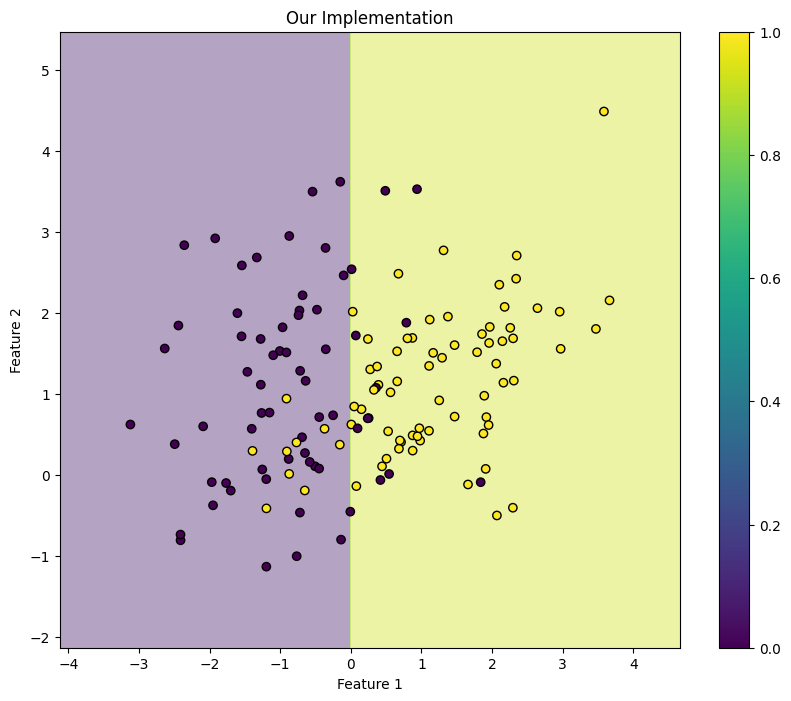

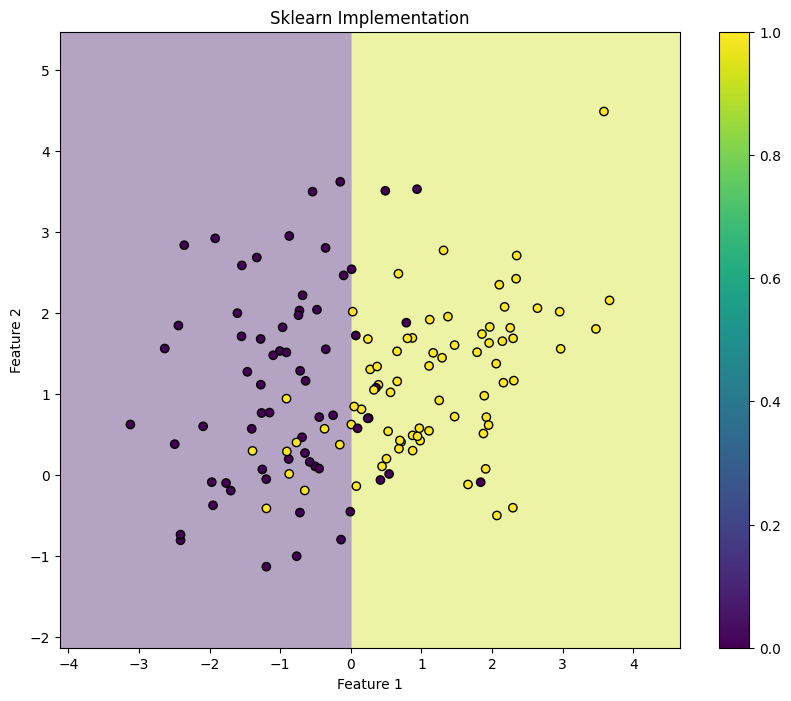


=== Testing Depth 2 Implementation ===
Building depth 2 decision tree...
Tree building completed!
Depth 2 Model Accuracy: 0.8667


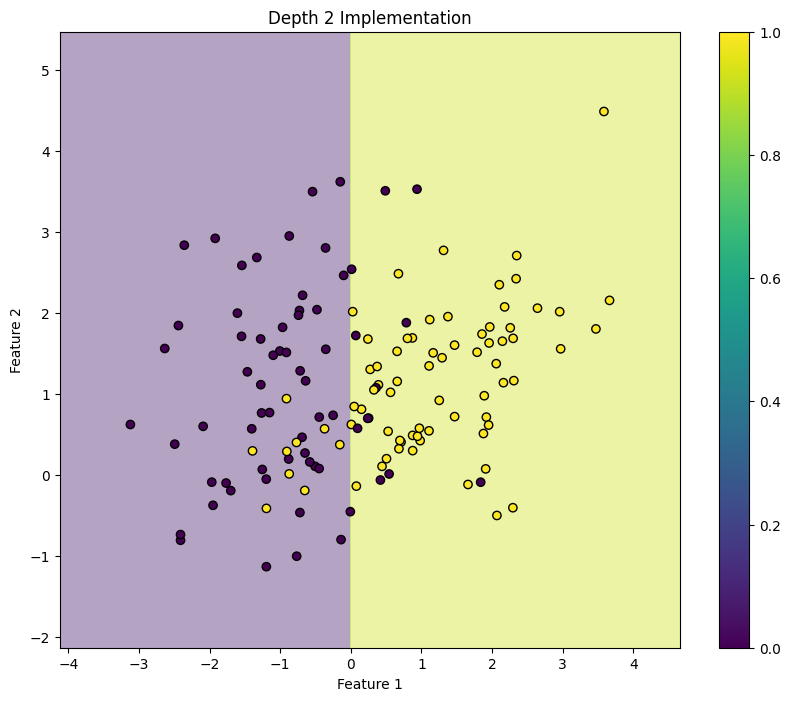


=== Testing Unlimited Depth Implementation ===
Building decision tree with max_depth=3...
Tree building completed!
Unlimited Depth Model Accuracy: 0.8333


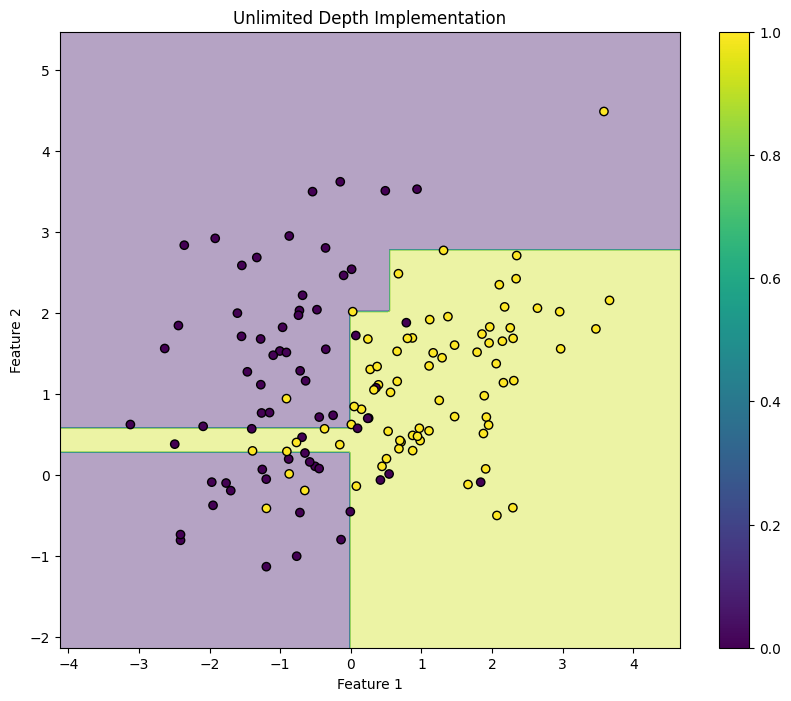


 All implementations completed successfully! 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Configuración para Google Colab
plt.style.use('default')
sns.set_palette("husl")

"""

 IMPLEMENTACIÓN DE ÁRBOLES DE DECISIÓN DESDE CERO


Propósito del Sprint:
- Comprender los árboles de decisión a través de implementación desde cero
- Acostumbrarse a implementar algoritmos complejos
- Aprender y verificar el funcionamiento del algoritmo

¿Qué es el aprendizaje del árbol de decisiones?
El aprendizaje de árboles de decisión es un método de aprendizaje automático que crea
un gráfico de una estructura de árbol llamada árbol de decisión. Se puede utilizar
tanto para clasificación como para regresión, y en el caso de la clasificación,
es posible la clasificación multivalor de tres o más clases.

¿Qué es un árbol de decisiones?
El árbol de decisión consiste en repetir la ramificación condicional sobre los datos
representados por el par atributo/valor. Un grafo con estructura de árbol que puede
asignarse a una clase.

Términos importantes:
- Nodo: Cada elemento encerrado en un círculo
- Nodo raíz: El nodo superior
- Nodo hoja: Nodo que representa el resultado de la clasificación
- Arista: La flecha condicional
- Profundidad: Número de aristas desde un nodo hasta el nodo raíz

Método implementado: CART (Classification and Regression Trees)
- Solo divide la rama en dos para reducir la complejidad del aprendizaje
- Utiliza impureza de Gini como criterio de división
================================================================================
"""

class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.feature_index = None
        self.threshold = None
        self.left_class = None
        self.right_class = None
        self.is_fitted = False

    """

    PROBLEMA 1: Función para encontrar impureza de Gini


    Cree una función para calcular la impureza de Gini de un nodo.
    Para el nodo t, la impureza de Gini I(t) se puede obtener mediante la siguiente fórmula:

    I(t) = 1 - Σ(i=1 to K) p²(Ci|t) = 1 - Σ(i=1 to K) (Nt,i/Nt,all)²

    Donde:
    - t: Índice de nodos
    - i: Índice de clases
    - K: Número de clases
    - Ci: La i-ésima clase
    - P(Ci|t): Probabilidad de la clase Ci en el nodo t
    - Nt,i: Número de muestras pertenecientes a la i-ésima clase del t-ésimo nodo
    - Nt,all: Número total de muestras en el nodo t-ésimo

    Cuanto más mezcladas estén las clases, mayor será la impureza de Gini.

    Ejemplos esperados:
    - Clase 1: 15 muestras, Clase 2: 15 muestras → Gini impuro 0.500
    - Clase 1: 15 muestras, Clase 2: 15 muestras, Clase 3: 15 muestras → Gini impuro 0.667
    - Clase 1: 18 muestras, Clase 2: 12 muestras → Gini impuro 0.480
    - Clase 1: 30 muestras, Clase 2: 0 muestras → Gini impuro 0.000
    ================================================================================
    """
    def _gini_impurity(self, y):
        """
        Calculate Gini impurity for a node

        Parameters
        ----------
        y : array-like
            Target values

        Returns
        -------
        float
            Gini impurity value
        """
        if len(y) == 0:
            return 0

        # Count occurrences of each class
        unique_classes, counts = np.unique(y, return_counts=True)
        total_samples = len(y)

        # Calculate Gini impurity: 1 - sum(p_i^2)
        gini = 1.0
        for count in counts:
            probability = count / total_samples
            gini -= probability ** 2

        return gini

    """

    PROBLEMA 2: Función para encontrar la ganancia de información


    Cree una función que calcule la ganancia de información entre los nodos.
    La ganancia de información IG se puede encontrar mediante la siguiente fórmula:

    IG(p) = I(p) - (N_left_all/N_p_all)*I(left) - (N_right_all/N_p_all)*I(right)

    Donde:
    - p: Índice que indica el nodo padre
    - left: Índice que muestra el nodo izquierdo
    - right: Índice que muestra los nodos a la derecha

    Cuanto mejor sea la separación, mayor será la ganancia de información.

    Ejemplo esperado:
    - Nodo izquierdo: Clase 1: 10 muestras, Clase 2: 30 muestras
    - Nodo derecho: Clase 1: 20 muestras, Clase 2: 5 muestras
    - Ganancia de información esperada: ~0.143
    ================================================================================
    """
    def _information_gain(self, y_parent, y_left, y_right):
        """
        Calculate information gain for a split

        Parameters
        ----------
        y_parent : array-like
            Target values of parent node
        y_left : array-like
            Target values of left child node
        y_right : array-like
            Target values of right child node

        Returns
        -------
        float
            Information gain value
        """
        # Calculate parent impurity
        parent_impurity = self._gini_impurity(y_parent)

        # Calculate weighted average of child impurities
        n_parent = len(y_parent)
        n_left = len(y_left)
        n_right = len(y_right)

        if n_parent == 0:
            return 0

        left_weight = n_left / n_parent
        right_weight = n_right / n_parent

        left_impurity = self._gini_impurity(y_left)
        right_impurity = self._gini_impurity(y_right)

        # Information gain = parent_impurity - weighted_child_impurities
        information_gain = parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)

        return information_gain

    def _get_majority_class(self, y):
        """
        Get the majority class from target values

        Parameters
        ----------
        y : array-like
            Target values

        Returns
        -------
        int or str
            Majority class
        """
        if len(y) == 0:
            return None

        unique_classes, counts = np.unique(y, return_counts=True)
        majority_index = np.argmax(counts)
        return unique_classes[majority_index]

    """

    PROBLEMA 3: Aprendizaje

    Escriba el código para dividir el espacio y generar un gráfico del árbol de decisión.
    Dado que se trata de un árbol de decisión con una profundidad de 1, lo dividiremos
    solo una vez. Generar un gráfico aquí significa determinar qué cantidad de características
    es mayor que cuántas como condición para una división.

    Se dividen todas las combinaciones de datos de entrenamiento y la división que maximiza
    la ganancia de información entre los nodos se registra como el criterio de división
    para ese nodo.

    Un nodo con cero impurezas que no mezcla clases, o un nodo con una profundidad específica,
    es un nodo hoja. Se registra una clase en el nodo hoja, la cual se utiliza como la clase
    que se clasificará en la estimación. Si las clases no están mezcladas, se registra la
    clase tal como está; si lo está, se decide por mayoría.

    Cómo tomar una combinación:
    La forma más sencilla de obtener todas las combinaciones es usar el valor de cada
    característica como umbral para la división. Use este método para este rasguño en un extremo.

    Otro método es establecer un valor intermedio como umbral, y scikit-learn utiliza este método.
    ================================================================================
    """
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        X = np.array(X)
        y = np.array(y)

        if self.verbose:
            print("Starting training...")
            print(f"Training data shape: {X.shape}")
            print(f"Number of classes: {len(np.unique(y))}")

        best_information_gain = -1
        best_feature = None
        best_threshold = None
        best_left_class = None
        best_right_class = None

        n_samples, n_features = X.shape

        # Try all features and all possible thresholds
        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)

            # Try each unique value as threshold
            for threshold in unique_values:
                # Split data based on threshold
                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold

                y_left = y[left_mask]
                y_right = y[right_mask]

                # Skip if one side is empty
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Calculate information gain
                info_gain = self._information_gain(y, y_left, y_right)

                if self.verbose:
                    print(f"Feature {feature_idx}, Threshold {threshold:.3f}, "
                          f"Info Gain: {info_gain:.4f}")

                # Update best split if this is better
                if info_gain > best_information_gain:
                    best_information_gain = info_gain
                    best_feature = feature_idx
                    best_threshold = threshold
                    best_left_class = self._get_majority_class(y_left)
                    best_right_class = self._get_majority_class(y_right)

        # Store the best split parameters
        self.feature_index = best_feature
        self.threshold = best_threshold
        self.left_class = best_left_class
        self.right_class = best_right_class
        self.is_fitted = True

        if self.verbose:
            print(f"\nBest split found:")
            print(f"Feature: {best_feature}")
            print(f"Threshold: {best_threshold:.3f}")
            print(f"Information Gain: {best_information_gain:.4f}")
            print(f"Left class: {best_left_class}")
            print(f"Right class: {best_right_class}")

    """

    PROBLEMA 4: Estimación


    Implemente el mecanismo de estimación. Añádalo al método de predicción incluido
    en la plantilla de la clase ScratchDecesionTreeClassifierDepth1.

    Evalúe el valor de los datos de entrada bajo las condiciones aprendidas y vea
    qué nodo hoja se alcanza. Dado que la clase se registra en el nodo hoja, esta
    es la estimación.
    ================================================================================
    """
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features to predict

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted labels
        """
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")

        X = np.array(X)
        predictions = np.zeros(X.shape[0], dtype=int)  # Cambio: usar dtype=int

        # Apply the learned split rule
        feature_values = X[:, self.feature_index]
        left_mask = feature_values <= self.threshold
        right_mask = feature_values > self.threshold

        predictions[left_mask] = int(self.left_class)  # Asegurar tipo int
        predictions[right_mask] = int(self.right_class)  # Asegurar tipo int

        return predictions

    def predict_proba(self, X):
        """
        Predict class probabilities

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features to predict

        Returns
        -------
        ndarray, shape (n_samples, n_classes)
            Class probabilities
        """
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")

        X = np.array(X)
        n_samples = X.shape[0]

        # For depth 1, we only have 2 possible classes
        probabilities = np.zeros((n_samples, 2))

        feature_values = X[:, self.feature_index]
        left_mask = feature_values <= self.threshold
        right_mask = feature_values > self.threshold

        # Assign probabilities based on majority class
        probabilities[left_mask, 0] = 1.0  # Left class
        probabilities[right_mask, 1] = 1.0  # Right class

        return probabilities


"""

PROBLEMA 1: Función para encontrar impureza - CASOS DE PRUEBA

"""
def test_gini_impurity():
    """Test the Gini impurity function with examples"""
    print("=== Testing Gini Impurity Function ===")

    # Create test cases
    test_cases = [
        ([0] * 15 + [1] * 15, 0.500),  # Equal distribution
        ([0] * 15 + [1] * 15 + [2] * 15, 0.667),  # Three classes equal
        ([0] * 18 + [1] * 12, 0.480),  # Unequal distribution
        ([0] * 30, 0.000),  # Pure node
    ]

    model = ScratchDecisionTreeClassifierDepth1()

    for i, (y, expected) in enumerate(test_cases):
        actual = model._gini_impurity(y)
        print(f"Test {i+1}: Expected {expected:.3f}, Got {actual:.3f}")
        assert abs(actual - expected) < 0.01, f"Test {i+1} failed"

    print("All Gini impurity tests passed!\n")


"""

PROBLEMA 2: Función para encontrar la ganancia de información - CASOS DE PRUEBA

"""
def test_information_gain():
    """Test the information gain function with examples"""
    print("=== Testing Information Gain Function ===")

    # Test case: Left node (10 class 1, 30 class 2), Right node (20 class 1, 5 class 2)
    y_parent = [0] * 30 + [1] * 35  # Total: 30 class 0, 35 class 1
    y_left = [0] * 10 + [1] * 30   # Left: 10 class 0, 30 class 1
    y_right = [0] * 20 + [1] * 5   # Right: 20 class 0, 5 class 1

    model = ScratchDecisionTreeClassifierDepth1()
    info_gain = model._information_gain(y_parent, y_left, y_right)

    print(f"Expected Information Gain: ~0.143")
    print(f"Actual Information Gain: {info_gain:.3f}")
    print("Information gain test completed!\n")


def create_sample_dataset():
    """Create a simple 2D dataset for testing"""
    np.random.seed(42)
    X, y = make_classification(
        n_samples=200,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y


"""

PROBLEMA 6: Visualización del área de decisión


Visualice el área de decisión.
"""
def visualize_decision_boundary(model, X, y, title="Decision Boundary"):
    """Visualize the decision boundary of the model"""
    plt.figure(figsize=(10, 8))

    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black')
    plt.colorbar(scatter)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


"""

PROBLEMA 5: Aprendizaje y estimación

Aprenda y estime la implementación de scratch para la clasificación binaria del
conjunto de datos simple 2 preparado en Sprint, una introducción al aprendizaje
automático scratch.

Compare esto con la implementación de scikit-learn y vea si funciona correctamente.

Utilice scikit-learn para valores indicadores como exactitud, precisión y recuperación.
"""
def compare_with_sklearn():
    """Compare our implementation with sklearn's DecisionTreeClassifier"""
    print("=== Comparing with sklearn DecisionTreeClassifier ===")

    # Create dataset
    X, y = create_sample_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train our model
    our_model = ScratchDecisionTreeClassifierDepth1(verbose=True)
    our_model.fit(X_train, y_train)

    # Train sklearn model
    sklearn_model = DecisionTreeClassifier(max_depth=1, random_state=42)
    sklearn_model.fit(X_train, y_train)

    # Make predictions
    our_predictions = our_model.predict(X_test)
    sklearn_predictions = sklearn_model.predict(X_test)

    # Ensure predictions are integers
    our_predictions = our_predictions.astype(int)
    sklearn_predictions = sklearn_predictions.astype(int)

    # Calculate metrics
    our_accuracy = accuracy_score(y_test, our_predictions)
    sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

    print(f"\nOur Model Accuracy: {our_accuracy:.4f}")
    print(f"Sklearn Model Accuracy: {sklearn_accuracy:.4f}")

    # Print detailed classification report
    print("\nOur Model Classification Report:")
    print(classification_report(y_test, our_predictions))

    print("\nSklearn Model Classification Report:")
    print(classification_report(y_test, sklearn_predictions))

    # Visualize decision boundaries
    visualize_decision_boundary(our_model, X_train, y_train, "Our Implementation")
    visualize_decision_boundary(sklearn_model, X_train, y_train, "Sklearn Implementation")

    return our_model, sklearn_model


"""

PROBLEMA 7: (Tarea avanzada) Creación de una clase clasificadora de árbol de
decisión con una profundidad de 2


Cree una clase de clasificador de árbol de decisión ScratchDecesionTreeClassifierDepth2
con una profundidad de 2.

Profundidad 2 significa que el espacio está dividido dos veces.

Pista: Tratar cada nodo como una instancia hace que sea más fácil ampliarlo a cualquier profundidad.
"""
class ScratchDecisionTreeClassifierDepth2():
    """
    Depth 2 decision tree classifier scratch implementation
    """

    def __init__(self, verbose=False):
        self.verbose = verbose
        self.tree = None
        self.is_fitted = False

    def _gini_impurity(self, y):
        """Calculate Gini impurity"""
        if len(y) == 0:
            return 0
        unique_classes, counts = np.unique(y, return_counts=True)
        total_samples = len(y)
        gini = 1.0
        for count in counts:
            probability = count / total_samples
            gini -= probability ** 2
        return gini

    def _information_gain(self, y_parent, y_left, y_right):
        """Calculate information gain"""
        parent_impurity = self._gini_impurity(y_parent)
        n_parent = len(y_parent)
        n_left = len(y_left)
        n_right = len(y_right)

        if n_parent == 0:
            return 0

        left_weight = n_left / n_parent
        right_weight = n_right / n_parent
        left_impurity = self._gini_impurity(y_left)
        right_impurity = self._gini_impurity(y_right)

        information_gain = parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)
        return information_gain

    def _get_majority_class(self, y):
        """Get majority class"""
        if len(y) == 0:
            return None
        unique_classes, counts = np.unique(y, return_counts=True)
        majority_index = np.argmax(counts)
        return unique_classes[majority_index]

    def _find_best_split(self, X, y):
        """Find the best split for given data"""
        best_information_gain = -1
        best_split = None

        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)

            for threshold in unique_values:
                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold

                y_left = y[left_mask]
                y_right = y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                info_gain = self._information_gain(y, y_left, y_right)

                if info_gain > best_information_gain:
                    best_information_gain = info_gain
                    best_split = {
                        'feature': feature_idx,
                        'threshold': threshold,
                        'left_mask': left_mask,
                        'right_mask': right_mask,
                        'info_gain': info_gain
                    }

        return best_split

    def _build_tree(self, X, y, depth=0, max_depth=2):
        """Recursively build the decision tree"""
        node = {
            'is_leaf': False,
            'class': None,
            'feature': None,
            'threshold': None,
            'left': None,
            'right': None,
            'depth': depth
        }

        # Check if we should stop splitting
        if depth >= max_depth or self._gini_impurity(y) == 0:
            node['is_leaf'] = True
            node['class'] = self._get_majority_class(y)
            return node

        # Find best split
        best_split = self._find_best_split(X, y)

        if best_split is None or best_split['info_gain'] <= 0:
            node['is_leaf'] = True
            node['class'] = self._get_majority_class(y)
            return node

        # Split the data
        X_left = X[best_split['left_mask']]
        y_left = y[best_split['left_mask']]
        X_right = X[best_split['right_mask']]
        y_right = y[best_split['right_mask']]

        # Set node properties
        node['feature'] = best_split['feature']
        node['threshold'] = best_split['threshold']

        # Recursively build left and right subtrees
        node['left'] = self._build_tree(X_left, y_left, depth + 1, max_depth)
        node['right'] = self._build_tree(X_right, y_right, depth + 1, max_depth)

        return node

    def fit(self, X, y):
        """Train the decision tree"""
        X = np.array(X)
        y = np.array(y)

        if self.verbose:
            print("Building depth 2 decision tree...")

        self.tree = self._build_tree(X, y, max_depth=2)
        self.is_fitted = True

        if self.verbose:
            print("Tree building completed!")

    def _predict_single(self, x, node):
        """Predict for a single sample"""
        if node['is_leaf']:
            return int(node['class'])  # Asegurar tipo int
        if x[node['feature']] <= node['threshold']:
            return self._predict_single(x, node['left'])
        else:
            return self._predict_single(x, node['right'])

    def predict(self, X):
        """Make predictions"""
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")

        X = np.array(X)
        predictions = []

        for x in X:
            pred = self._predict_single(x, self.tree)
            predictions.append(pred)

        return np.array(predictions, dtype=int)  # Asegurar tipo int


"""

PROBLEMA 8: (Tarea avanzada) Creación de una clase clasificadora de árbol de
decisión con profundidad ilimitada

Cree una clase de clasificador de árbol de decisión ScratchDecesionTreeClassifierDepthInf
con profundidad ilimitada.

Permite que se especifique cualquier profundidad; de lo contrario, permite que todos
los nodos de hojas continúen hasta que toda la impureza de Gini sea cero.

Las siguientes formas de ndarray, forma (n_muestras, n_características)

Muestra el proceso de aprendizaje cuando #verbose está configurado como Verdadero

Implementación inicial del clasificador de árbol de decisión de profundidad 1

Estimar la etiqueta utilizando un clasificador de árbol de decisión

Registrar hiperparámetros como atributos

La siguiente forma de ndarray, forma (n_muestras,)

Fiel al resultado del proceso de aprendizaje

Aprenda el clasificador de árboles de decisión

Características de los datos de entrenamiento

Valor de respuesta correcta de los datos de entrenamiento
"""
class ScratchDecisionTreeClassifierDepthInf():
    """
    Decision tree classifier with unlimited depth
    """

    def __init__(self, max_depth=None, min_samples_split=2, verbose=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.verbose = verbose
        self.tree = None
        self.is_fitted = False

    def _gini_impurity(self, y):
        """Calculate Gini impurity"""
        if len(y) == 0:
            return 0
        unique_classes, counts = np.unique(y, return_counts=True)
        total_samples = len(y)
        gini = 1.0
        for count in counts:
            probability = count / total_samples
            gini -= probability ** 2
        return gini

    def _information_gain(self, y_parent, y_left, y_right):
        """Calculate information gain"""
        parent_impurity = self._gini_impurity(y_parent)
        n_parent = len(y_parent)
        n_left = len(y_left)
        n_right = len(y_right)

        if n_parent == 0:
            return 0

        left_weight = n_left / n_parent
        right_weight = n_right / n_parent
        left_impurity = self._gini_impurity(y_left)
        right_impurity = self._gini_impurity(y_right)

        information_gain = parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)
        return information_gain

    def _get_majority_class(self, y):
        """Get majority class"""
        if len(y) == 0:
            return None
        unique_classes, counts = np.unique(y, return_counts=True)
        majority_index = np.argmax(counts)
        return unique_classes[majority_index]

    def _find_best_split(self, X, y):
        """Find the best split for given data"""
        best_information_gain = -1
        best_split = None

        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]
            unique_values = np.unique(feature_values)

            for threshold in unique_values:
                left_mask = feature_values <= threshold
                right_mask = feature_values > threshold

                y_left = y[left_mask]
                y_right = y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                info_gain = self._information_gain(y, y_left, y_right)

                if info_gain > best_information_gain:
                    best_information_gain = info_gain
                    best_split = {
                        'feature': feature_idx,
                        'threshold': threshold,
                        'left_mask': left_mask,
                        'right_mask': right_mask,
                        'info_gain': info_gain
                    }

        return best_split

    def _build_tree(self, X, y, depth=0):
        """Recursively build the decision tree"""
        node = {
            'is_leaf': False,
            'class': None,
            'feature': None,
            'threshold': None,
            'left': None,
            'right': None,
            'depth': depth
        }

        # Check stopping criteria
        should_stop = (
            depth >= self.max_depth if self.max_depth is not None else False or
            len(y) < self.min_samples_split or
            self._gini_impurity(y) == 0 or
            len(np.unique(y)) == 1
        )

        if should_stop:
            node['is_leaf'] = True
            node['class'] = self._get_majority_class(y)
            return node

        # Find best split
        best_split = self._find_best_split(X, y)

        if best_split is None or best_split['info_gain'] <= 0:
            node['is_leaf'] = True
            node['class'] = self._get_majority_class(y)
            return node

        # Split the data
        X_left = X[best_split['left_mask']]
        y_left = y[best_split['left_mask']]
        X_right = X[best_split['right_mask']]
        y_right = y[best_split['right_mask']]

        # Set node properties
        node['feature'] = best_split['feature']
        node['threshold'] = best_split['threshold']

        # Recursively build left and right subtrees
        node['left'] = self._build_tree(X_left, y_left, depth + 1)
        node['right'] = self._build_tree(X_right, y_right, depth + 1)

        return node

    def fit(self, X, y):
        """Train the decision tree"""
        X = np.array(X)
        y = np.array(y)

        if self.verbose:
            print(f"Building decision tree with max_depth={self.max_depth}...")

        self.tree = self._build_tree(X, y)
        self.is_fitted = True

        if self.verbose:
            print("Tree building completed!")

    def _predict_single(self, x, node):
        """Predict for a single sample"""
        if node['is_leaf']:
            return int(node['class'])  # Asegurar tipo int
        if x[node['feature']] <= node['threshold']:
            return self._predict_single(x, node['left'])
        else:
            return self._predict_single(x, node['right'])

    def predict(self, X):
        """Make predictions"""
        if not self.is_fitted:
            raise ValueError("Model must be fitted before making predictions")

        X = np.array(X)
        predictions = []

        for x in X:
            pred = self._predict_single(x, self.tree)
            predictions.append(pred)

        return np.array(predictions, dtype=int)  # Asegurar tipo int


"""

FUNCIÓN PRINCIPAL - EJECUTA TODOS LOS PROBLEMAS

"""
def main():
    """Main function to run all tests and examples"""
    print(" Decision Tree Implementation from Scratch ")
    print("=" * 50)

    # Test individual functions
    test_gini_impurity()
    test_information_gain()

    # Compare with sklearn
    our_model, sklearn_model = compare_with_sklearn()

    # Test depth 2 implementation
    print("\n=== Testing Depth 2 Implementation ===")
    X, y = create_sample_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    depth2_model = ScratchDecisionTreeClassifierDepth2(verbose=True)
    depth2_model.fit(X_train, y_train)
    depth2_predictions = depth2_model.predict(X_test)
    depth2_accuracy = accuracy_score(y_test, depth2_predictions)

    print(f"Depth 2 Model Accuracy: {depth2_accuracy:.4f}")
    visualize_decision_boundary(depth2_model, X_train, y_train, "Depth 2 Implementation")

    # Test unlimited depth implementation
    print("\n=== Testing Unlimited Depth Implementation ===")
    depth_inf_model = ScratchDecisionTreeClassifierDepthInf(max_depth=3, verbose=True)
    depth_inf_model.fit(X_train, y_train)
    depth_inf_predictions = depth_inf_model.predict(X_test)
    depth_inf_accuracy = accuracy_score(y_test, depth_inf_predictions)

    print(f"Unlimited Depth Model Accuracy: {depth_inf_accuracy:.4f}")
    visualize_decision_boundary(depth_inf_model, X_train, y_train, "Unlimited Depth Implementation")

    print("\n All implementations completed successfully! ")


if __name__ == "__main__":
    main()